In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [1]:
import pandas as pd

df = pd.read_csv("train.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [2]:
# Check structure of the dataset
df.info()

# Summary statistics
df.describe()

# Check missing values
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

## Initial Data Observations

- The dataset has **891 rows** and **12 columns**.
- Most columns are complete, but:
  - `Age` has **177 missing values**
  - `Cabin` has **687 missing values** (most of the data)
  - `Embarked` has **2 missing values**
- Columns like `Sex`, `Name`, `Ticket`, `Cabin`, and `Embarked` are of type `object` (text).
- `Fare` and `Age` are numeric and can be used for plots.
- `Survived`, `Pclass`, `SibSp`, `Parch` are all categorical or ordinal features.

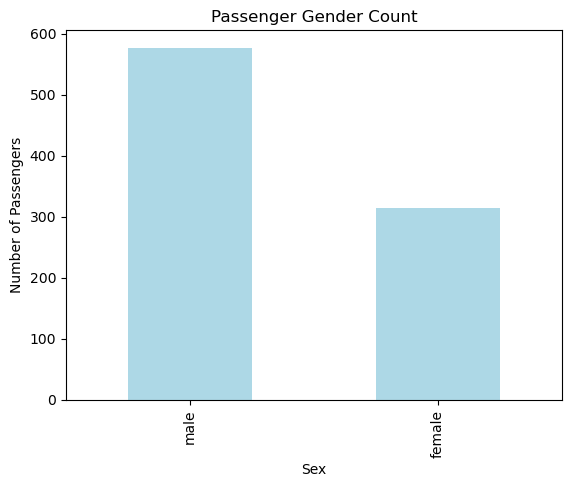

In [5]:
df['Sex'].value_counts().plot(kind='bar', color='lightblue')
plt.title('Passenger Gender Count')
plt.xlabel('Sex')
plt.ylabel('Number of Passengers')
plt.show()

## Observation: Gender Distribution

- There are significantly more male passengers than female passengers on the Titanic.
- This may impact survival outcomes, which we'll explore next.

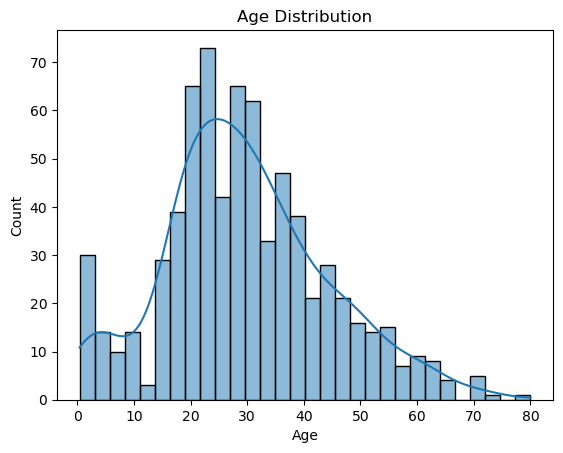

In [6]:
sns.histplot(df['Age'].dropna(), bins=30, kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

### Observation: Age Distribution

- The ages of Titanic passengers are spread mostly between 0 and 50 years.
- The most common age group appears to be **20–30 years old**.
- There are fewer elderly passengers (above 60).
- Some children (below 10) were also on board.
- The distribution has a **slight right skew**, meaning there are some older passengers but not many.

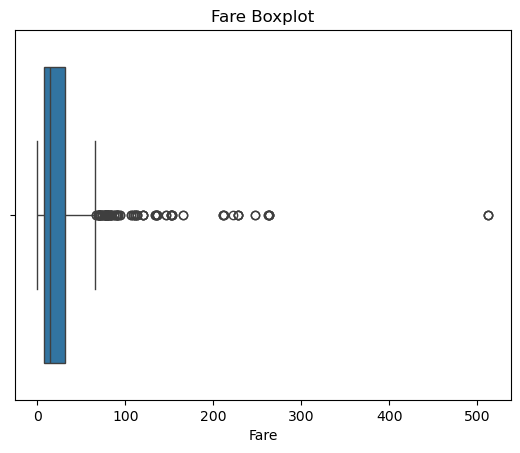

In [7]:
sns.boxplot(x=df['Fare'])
plt.title('Fare Boxplot')
plt.show()

### Observation: Fare Distribution

- Most passengers paid a fare between **$0 and $100**.
- There are several **extreme outliers**, with some fares above **$500**.
- The median fare appears to be around **$30–$40**.
- The presence of outliers suggests that some passengers (likely in 1st class) paid significantly more than others.

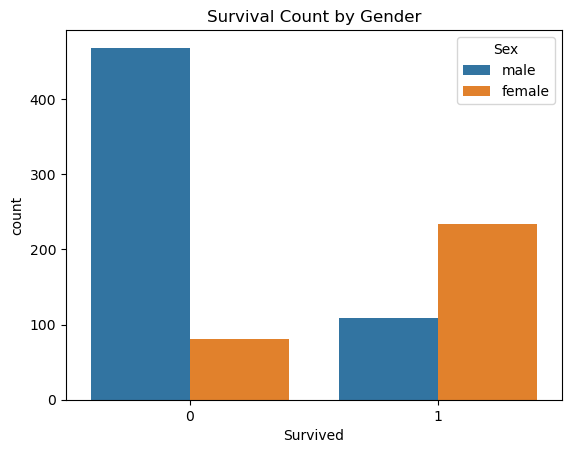

In [8]:
sns.countplot(x='Survived', hue='Sex', data=df)
plt.title('Survival Count by Gender')
plt.show()

### Observation: Survival by Gender

- The majority of **male passengers did not survive**, while most **female passengers survived**.
- This shows a clear survival bias toward females, likely due to the "women and children first" evacuation policy.
- Gender is a strong factor influencing survival on the Titanic.

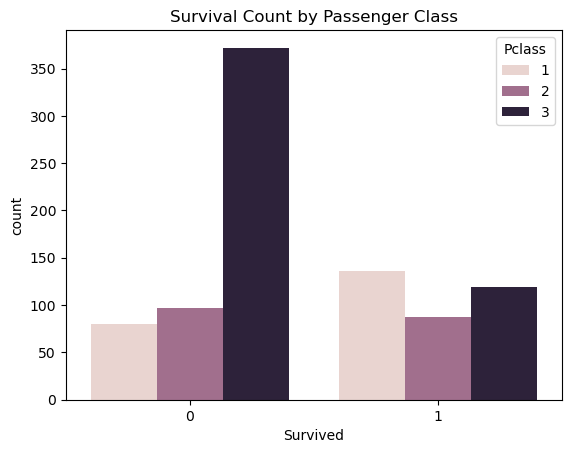

In [9]:
sns.countplot(x='Survived', hue='Pclass', data=df)
plt.title('Survival Count by Passenger Class')
plt.show()

### Observation: Survival by Passenger Class

- Passengers in **1st class had the highest survival rate**.
- **3rd class passengers had the highest number of deaths**.
- This indicates that survival was strongly influenced by ticket class, possibly due to:
  - Cabin location (closer to lifeboats)
  - Priority access to evacuation
  - Socio-economic factors


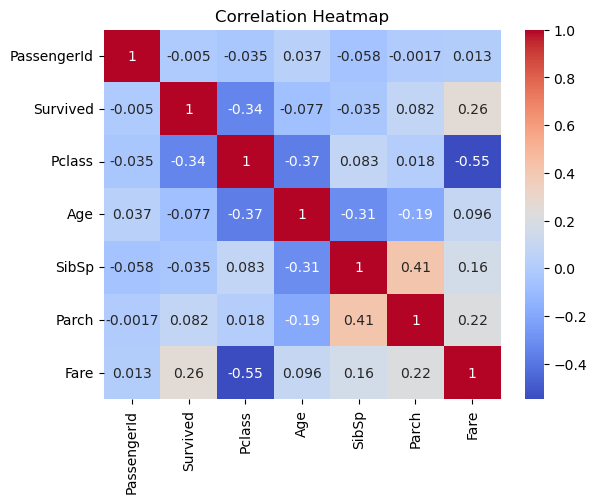

In [11]:
numeric_df = df.select_dtypes(include=['int64', 'float64'])
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

### Observation: Correlation Heatmap

- There is a moderate positive correlation between **Fare and Pclass** (lower class = lower fare).
- **Pclass is negatively correlated with survival**, meaning passengers in higher classes had a better chance of surviving.
- Other numerical columns (like SibSp and Parch) show weak correlations with survival.